In [ ]:

import os
from getpass import getpass
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/missionfission/dragon-project 

In [1]:
# !pip install dragon-project/requirements.txt
# !pip install yamlordereddictloader
# !pip install transformers==4.0
# %cd dragon-project/src
%mkdir iters
%mkdir logs
# !ls
# !git clone https://github.com/facebookresearch/dlrm


mkdir: cannot create directory ‘iters’: File exists
mkdir: cannot create directory ‘logs’: File exists


In [6]:
%load_ext autoreload

%autoreload 2

import glob
import os
import sys
from collections import deque
from copy import deepcopy

import numpy as np
import torch
import torch.nn as nn
import yaml
import yamlordereddictloader

from torchvision import models
from yaml import dump
from scheduling import Scheduling
from generator import Generator, get_mem_props
from generator import *
from utils.visualizer import *
from ir.trace import trace
from ddfg_main import synthesis_hardware
from main import design_tech_runner, design_runner, perf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from common_models import alexnet_graph, vggnet_graph, resnet_graph, bert_graph, gpt2_graph, dlrm_graph, alexnet_graph, langmodel_graph
# design_runner([vggnet_graph()])
# # for node in dlrm_graph.nodes:
# #     print(node.in_edge_mem + node.mem_fetch + node.out_edge_mem, node.compute_expense )

# design_tech_runner([dlrm_graph])
vgg11_graph = vggnet_graph()
resnet_graph_data = resnet_graph()
alexnet_data = alexnet_graph()
langmod_graph1, langmod_graph2 = langmodel_graph()
# dlrm_graph_data = dlrm_graph()
bert_graph_data = bert_graph()
gpt2_graph_data = gpt2_graph()
# 
# from nonai_models.graph_processing import graph_processing

In [4]:
resnet_graph_data

torchvision.models.resnet.ResNet (
	%input.1: float[1, 3, 224, 224],
	%1: float[64, 3, 7, 7],
	%2: float[64],
	%3: float[64],
	%4: float[64],
	%5: float[64],
	%7: float[64, 64, 1, 1],
	%8: float[64],
	%9: float[64],
	%10: float[64],
	%11: float[64],
	%13: float[64, 64, 3, 3],
	%14: float[64],
	%15: float[64],
	%16: float[64],
	%17: float[64],
	%19: float[256, 64, 1, 1],
	%20: float[256],
	%21: float[256],
	%22: float[256],
	%23: float[256],
	%25: float[256, 64, 1, 1],
	%26: float[256],
	%27: float[256],
	%28: float[256],
	%29: float[256],
	%31: float[64, 256, 1, 1],
	%32: float[64],
	%33: float[64],
	%34: float[64],
	%35: float[64],
	%37: float[64, 64, 3, 3],
	%38: float[64],
	%39: float[64],
	%40: float[64],
	%41: float[64],
	%43: float[256, 64, 1, 1],
	%44: float[256],
	%45: float[256],
	%46: float[256],
	%47: float[256],
	%49: float[64, 256, 1, 1],
	%50: float[64],
	%51: float[64],
	%52: float[64],
	%53: float[64],
	%55: float[64, 64, 3, 3],
	%56: float[64],
	%57: float[64],
	%58: f

# Example 1 : Resnet-50  (Feedforward Neural Networks): Performance Estimation 


<img src="attachment:image.png" width="400">


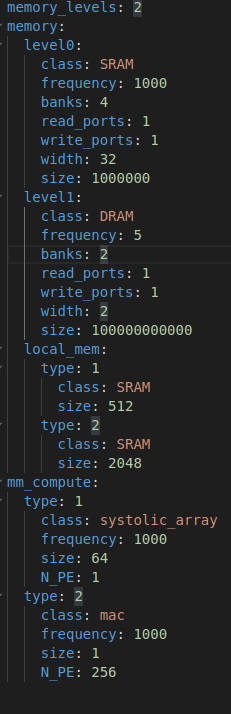

In [7]:
perf(resnet_graph_data, backprop=False, print_stats=True, filename = 'illusion_nvm.yaml', mapping="nn_dataflow")

Time 1165254 6384 160534
Energy 4989825294 971181747 3762051399 5521181 4730224 9217617 2653334 1200954 9217617868
Area 285631 50462 24499 210669
memory accesses 53073992 53073992 25505960 11544528
rf access 2044593152.0
Design Params 
 No. of PEs :  4096 
 Memory Level-1 Connectivity :  256 
 Memory Level-0 Size :  2000000 
 Memory Level-0 Read Energy :  0.104028
Tech Params [1, 1, 40]


([1165254.541015625, 6384, 160534, 0],
 [4989825294, 971181747, 5521181, 4730224, 9217617, 163238144, 73884979, 0],
 285631.669568)

## Example 2 : Non-AI Workloads : Architecture Synthesis and Performance Estimation 

In [8]:
import ast

from ir.staticfg.staticfg import CFGBuilder
cfg = CFGBuilder().build_from_file(
    "aes.py",
    "nonai_models/aes.py",
)
# cfg.build_visual("aes", "pdf", show=True)
print(cfg)

Subscript(value=Name(id='matrix', ctx=Load()), slice=Index(value=BinOp(left=Name(id='i', ctx=Load()), op=Div(), right=Constant(value=4, kind=None))), ctx=Load())
Subscript(value=Attribute(value=Name(id='self', ctx=Load()), attr='round_keys', ctx=Load()), slice=Index(value=Name(id='i', ctx=Load())), ctx=Load())
Subscript(value=Attribute(value=Name(id='self', ctx=Load()), attr='round_keys', ctx=Load()), slice=Index(value=Name(id='i', ctx=Load())), ctx=Load())
Subscript(value=Attribute(value=Name(id='self', ctx=Load()), attr='round_keys', ctx=Load()), slice=Index(value=Name(id='i', ctx=Load())), ctx=Load())
CFG for aes.py


# AES : Advanced Encryption Standard

<img src="attachment:image.png" width="400">


# Python Function

<img src="attachment:image.png" width="800">


# AST (Abstract Syntax Tree) Generation

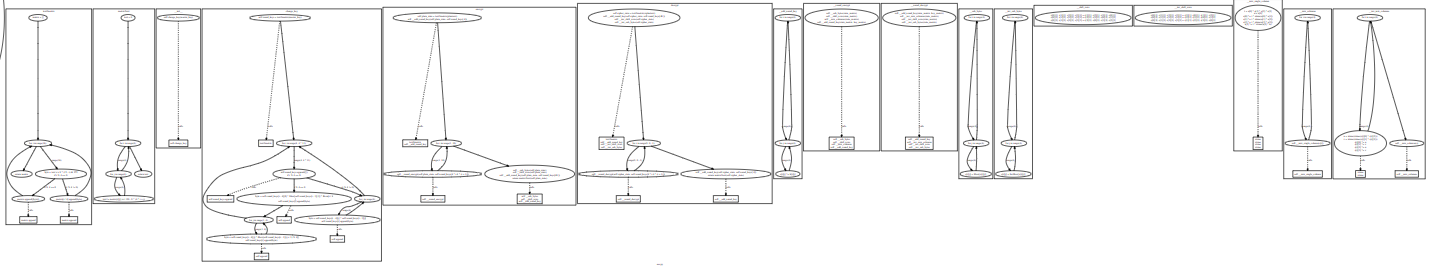

## Encrypt Function : AST

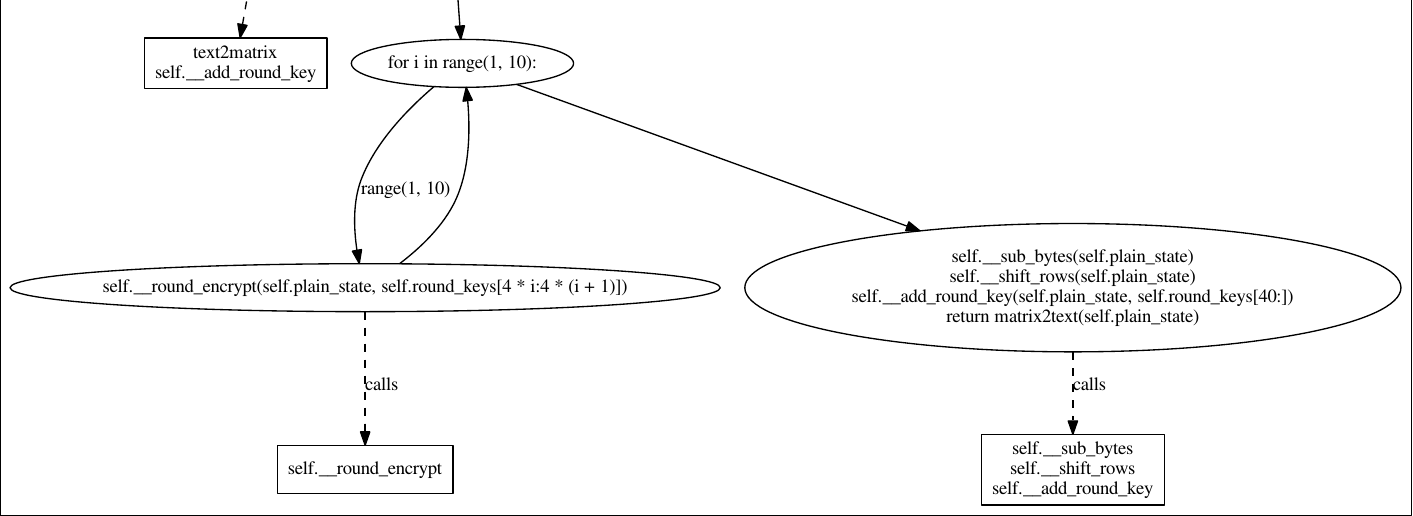

# Hardware Synthesis

In [4]:
synthesis_hardware("aes")

NameError: name 'synthesis_hardware' is not defined

In [9]:
from synthesis.hls import parse_graph, get_stats
parse_graph(cfg)
get_stats(cfg)

['return (a ', ' 1 ', ' 27) ', ' 255 if a ', ' 128 else a ', ' 1\n'] return (a << 1 ^ 27) & 255 if a & 128 else a << 1

43.54000000000002
['matrix ', ' []\n'] matrix = []

87.08000000000004
['return matrix\n'] return matrix

130.62000000000006
['text ', ' 0\n'] text = 0

174.16000000000008
['return text\n'] return text

217.7000000000001
['self.change_key(master_key)\n'] self.change_key(master_key)

261.2400000000001
['self.round_keys ', ' text2matrix(master_key)\n'] self.round_keys = text2matrix(master_key)

304.78000000000014
['self.plain_state ', ' text2matrix(plaintext)\n'] self.plain_state = text2matrix(plaintext)

348.32000000000016
['self.__add_round_key(self.plain_state, self.round_keys[:4])\n'] self.__add_round_key(self.plain_state, self.round_keys[:4])

391.8600000000002
['self.__sub_bytes(self.plain_state)\n'] self.__sub_bytes(self.plain_state)

435.4000000000002
['self.__shift_rows(self.plain_state)\n'] self.__shift_rows(self.plain_state)

478.9400000000002
['self.__add_rou

AttributeError: 'str' object has no attribute 'value'

# Graph Analytics : BFS

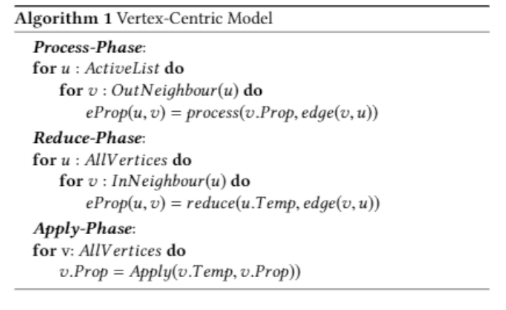

<img src="attachment:image.png" width="800">


In [14]:
synthesis_hardware("aes")

-------------------------------
aes,aes_aes/inputs/dynamic_trace.gz,aes_aes/test_aes.cfg,
-------------------------------
      Setting ScratchPad       
-------------------------------
-------------------------------
      Generating DDDG          
-------------------------------
-------------------------------1
-------------------------------2
-------------------------------
Num of Nodes: 14811
Num of Edges: 35693
Num of Reg Edges: 19191
Num of MEM Edges: 2132
Num of Control Edges: 14810
-------------------------------
-------------------------------
    Initializing BaseDatapath      
-------------------------------
 Top level: aes256_encrypt_ecb
      Optimizing...            aes
  Removing 9081 edges.
  Adding 6506 new edges.
  Removing 491 isolated nodes.
-------------------------------
        Mem to Reg Conv        
-------------------------------
-------------------------------
      ScratchPad Partition     
-------------------------------
cache_size 256
line_size 4
associati

# Architecture Generation  : Google Bert

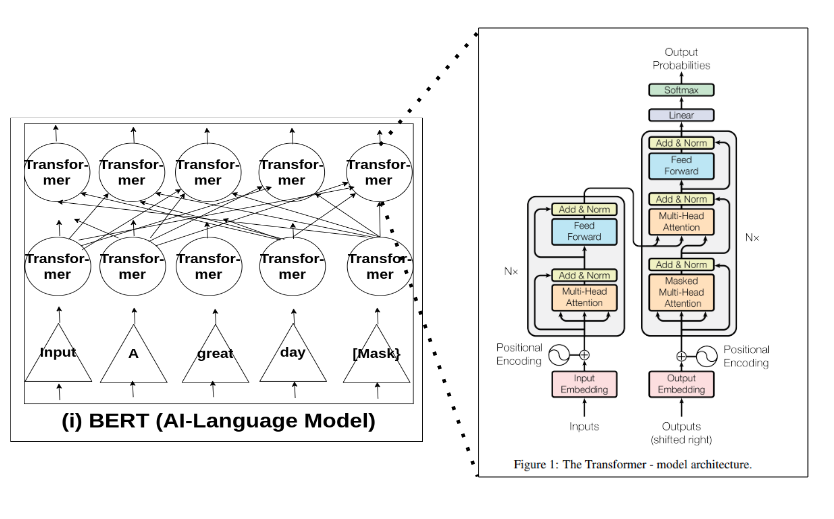

In [13]:
bert_graph_data

transformers.modeling_bert.BertModel (
	%input.1: long[1, 16],
	%1: long[1, 512],
	%2: float[30522, 768],
	%3: float[512, 768],
	%4: float[2, 768],
	%5: float[768],
	%6: float[768],
	%7: float[768, 768],
	%8: float[768],
	%9: float[768, 768],
	%10: float[768],
	%11: float[768, 768],
	%12: float[768],
	%13: float[768, 768],
	%14: float[768],
	%15: float[768],
	%16: float[768],
	%17: float[3072, 768],
	%18: float[3072],
	%19: float[768, 3072],
	%20: float[768],
	%21: float[768],
	%22: float[768],
	%23: float[768, 768],
	%24: float[768],
	%25: float[768, 768],
	%26: float[768],
	%27: float[768, 768],
	%28: float[768],
	%29: float[768, 768],
	%30: float[768],
	%31: float[768],
	%32: float[768],
	%33: float[3072, 768],
	%34: float[3072],
	%35: float[768, 3072],
	%36: float[768],
	%37: float[768],
	%38: float[768],
	%39: float[768, 768],
	%40: float[768],
	%41: float[768, 768],
	%42: float[768],
	%43: float[768, 768],
	%44: float[768],
	%45: float[768, 768],
	%46: float[768],
	%47: float[768

In [12]:
backprop = True
import time
start = time.time()
# name = ["vgg_graph", "resnet_graph","bert_graph","gpt2_graph", "dlrm_graph"]
# graph_list = [vgg11_graph, resnet_graph_data, bert_graph_data, gpt2_graph_data, dlrm_graph_data]
graph_list = [bert_graph_data]
name = ["bert_graph_data"]

for i,graph in enumerate(graph_list):
# for graph in [bert_graph_data]:
    log_file_name = "logs/"+str(name[i])+str(backprop)
    arch_time, arch_energy, arch_area = design_runner([graph], backprop, print_stats= False, stats_file = log_file_name)
# end = time.time()
# print(end-start)

======Optimizing Design=========
Faster :  6.300863118463623 Energy Improvement :  2.547587124233601 Area Budget :  0.6007853213621843


# 100X EDP : Technology Targets Generation (Google BERT)

In [14]:
generate_tech_targets([bert_graph_data], name = "BERT", EDP = 100)

For Benefit of EDP  100
Generating Technology Targets
Connectivity : 31x (T : 9.5, E : 2.3)
Logic Energy : 6x (T: 1.0, E: 2.1)
Logic Latency,  Connectivity : 2x (T: 1.9, E:1.1)


[autoreload of generator failed: Traceback (most recent call last):
  File "/home/khushal/miniconda3/envs/stanford_code/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/khushal/miniconda3/envs/stanford_code/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/khushal/miniconda3/envs/stanford_code/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/khushal/miniconda3/envs/stanford_code/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._b

{}

# Algorithm Tranformation

In [4]:
from algorithms import algo_optim.full

In [2]:
# hw = 'illusion_nvm.yaml'
# graph = resnet50_graph
# bottlenecks, updated_graph = algo_optim.full(graph, hw)
# # updated_graph -> to pytorch code, transformed
# print(graph)
# print(updated_graph)


# HPCG

In [2]:
import ast

from ir.staticfg.staticfg import CFGBuilder
cfg = CFGBuilder().build_from_file(
    "hpcg.py",
    "nonai_models/hpcg.py",
)
cfg.build_visual("hpcg", "pdf", show=False)
# print(cfg)

# Conjugate Gradient Top Level

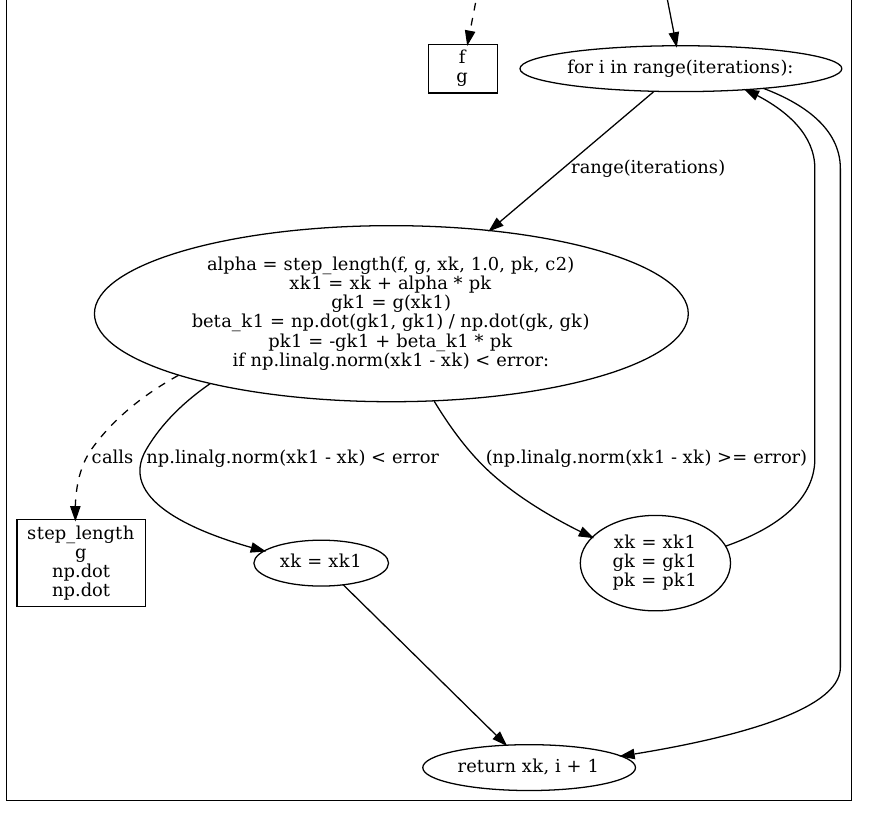

# Step Length

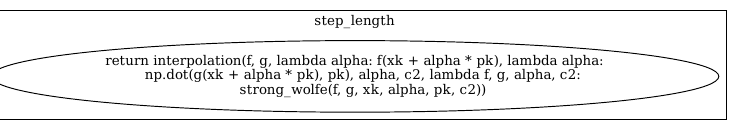

# Interpolation

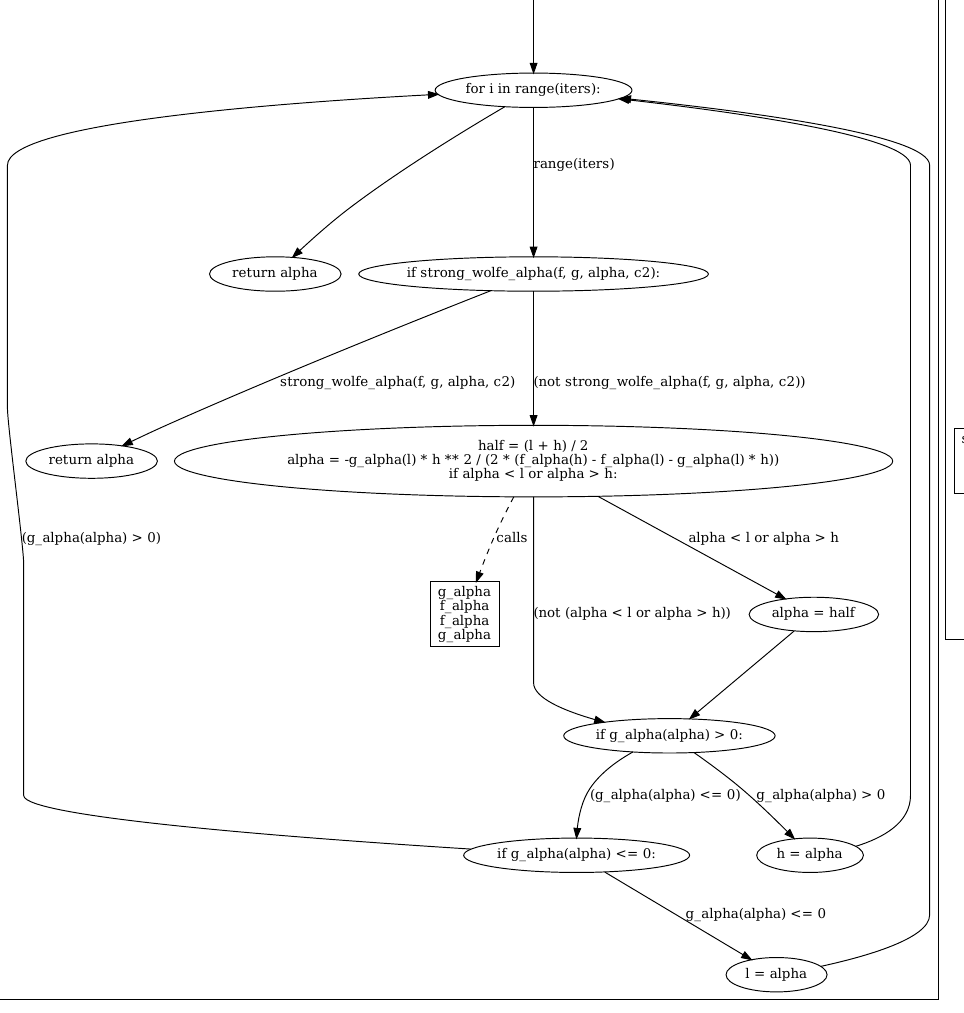

# Strong wolfe

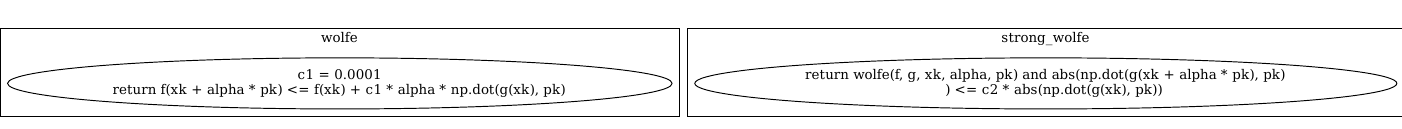

# Functions 

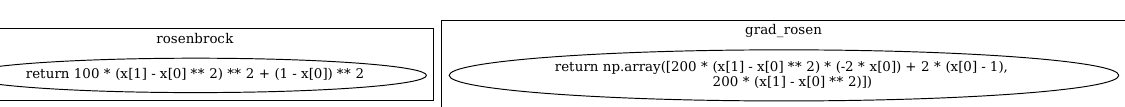

In [1]:
# synthesis_hardware("hpcg")
from synthesis.hls import parse_graph, get_stats
parse_graph(cfg)
get_stats(cfg)

## Processing Elements 
### 1. Sparse Matrix Multiplicaton : Dot Product
### 2. SymGS : 
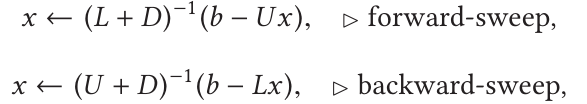

## 100X EDP : Technology Targets Generation

In [8]:
generate_tech_targets(cfg, name = "hpcg", EDP = 100)

For Benefit of EDP  100
Generating Technology Targets
External Memory Connectivity : 31x (T : 9.5, E : 2.3)
Logic Energy : 6x (T: 1.0, E: 2.1)
Logic Latency,  NoC Connectivity : 2x (T: 1.9, E:1.1)


{}